In [22]:
import torch
torch.cuda.is_available()

True

In [23]:
x = torch.tensor([2.0], requires_grad=True)
print(x)

tensor([2.], requires_grad=True)


In [24]:
y = x ** 2 + 2 * x + 1
print(y)

tensor([9.], grad_fn=<AddBackward0>)


In [25]:
y.backward()

In [26]:
x.grad

tensor([6.])

In [27]:
import torch

# Create a tensor with requires_grad=True
x = torch.tensor([1., 2., 3.], requires_grad=True)

# Compute a function of x
y = x.sum()

# Compute gradients of y with respect to x
y.backward()

# Print gradients of x
print(x.grad)

tensor([1., 1., 1.])


In [28]:
# Exercise 1.
# Compute the gradient for the sigmoid activation function in 2 points using pytorch and check it with the known explicit formula 

import torch
import math

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# Create a PyTorch tensor with two values
x = torch.tensor([2.0, -1.0], requires_grad=True)

# Apply the sigmoid function to the tensor
y = torch.sigmoid(x)

# Compute the gradient of y with respect to x
y.sum().backward()

# Print the gradients
print("Gradient of sigmoid function: ", x.grad)

# Compute the gradient of the sigmoid function explicitly
grad_explicit = []
for i in range(len(x)):
    s = sigmoid(x[i])
    grad_explicit.append(s * (1 - s))
print("Gradient of sigmoid function (explicit): ", grad_explicit)

Gradient of sigmoid function:  tensor([0.1050, 0.1966])
Gradient of sigmoid function (explicit):  [0.10499358540350662, 0.19661193324148185]


In [29]:
# Exercise 2.
# Compute the gradient for the linear activation function in 2 points using pytorch and check it with the known explicit formula

import torch

# Define the input tensor
x = torch.tensor([2.0, 3.0], requires_grad=True)

# Define the linear activation function
y = x

# Compute the gradient of y with respect to x
y.sum().backward()

# Print the gradient values at the two points
print(x.grad)

tensor([1., 1.])


In [30]:
# Execise 3.
# Compute the gradient for the relu activation function in 2 points using pytorch and check it with the known explicit formula.

import torch

# Define the input tensor
x = torch.tensor([2.0, -2.0], requires_grad=True)

# Define the relu activation function
y = torch.relu(x)

# Compute the gradient of y with respect to x
grad = torch.autograd.grad(y, x, torch.ones_like(y))[0]

# Print the gradient values at the two points
print(grad)

tensor([1., 0.])


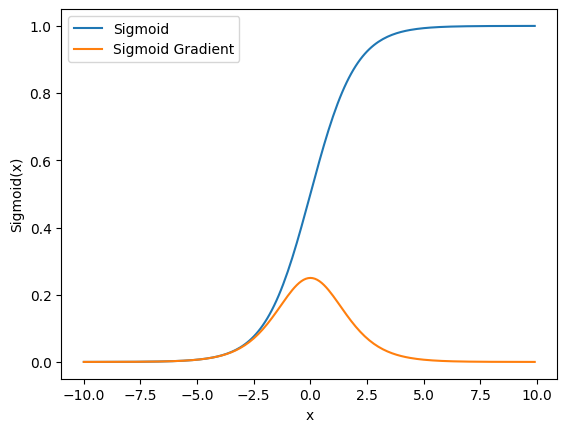

In [31]:
# Exercise 4. 
# Write in python a function to plot the sigmoid activation function and its gradient using matplotlib

# Plotting the Sigmoid Function in Python with Matplotlib

import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

# Plot the sigmoid gradient
def sigmoid_gradient(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Values for the sigmoid function
values = np.arange(-10, 10, 0.1)

# Plot the sigmoid function
plt.plot(values, sigmoid(values))

# Plot the sigmoid gradient
plt.plot(values, sigmoid_gradient(values))

# Plot the legend
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
plt.legend(['Sigmoid', 'Sigmoid Gradient'])
plt.show()


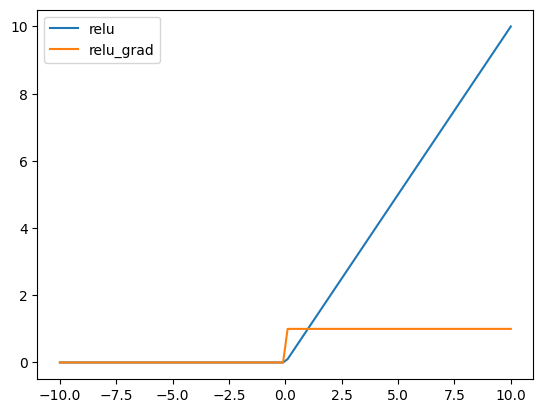

In [32]:
# Exercise 5. 
# Write in python a function to plot the ReLU activation function and its gradient using matplotlib.

import matplotlib.pyplot as plt
import numpy as np

# ReLU function
def relu(x):
    return np.maximum(0, x)

# ReLU gradient
def relu_grad(x):
    return np.where(x > 0, 1, 0)

# Plot the ReLU function
x = np.linspace(-10, 10, 100)

# Plot the ReLU function
y = relu(x)

# Plot the ReLU gradient
z = relu_grad(x)

# Plot the ReLU function and its gradient
plt.plot(x, y, label='relu')
plt.plot(x, z, label='relu_grad')
plt.legend()
plt.show()

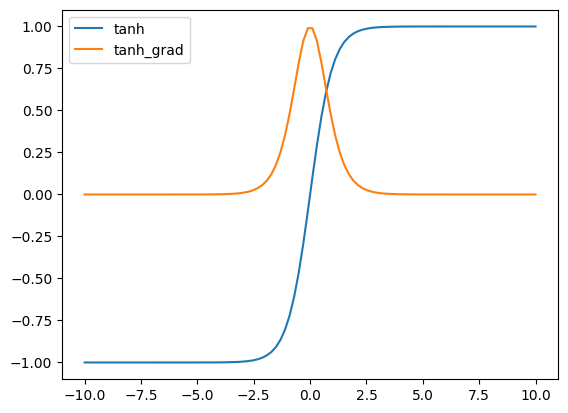

In [33]:
# Exercise 6. 
# Write in python a function to plot the tanh activation function and its gradient using matplotlib.

import numpy as np
import matplotlib.pyplot as plt

# tanh function
def tanh(x):
    return np.tanh(x)

# tanh gradient
def tanh_grad(x):
    return 1 - np.tanh(x) ** 2

# Plot the tanh function and its gradient
x = np.linspace(-10, 10, 100)
# tanh function
y = tanh(x)
# tanh gradient
z = tanh_grad(x)

# Plot the tanh function and its gradient
plt.plot(x, y, label='tanh')
plt.plot(x, z, label='tanh_grad')
plt.legend()
plt.show()

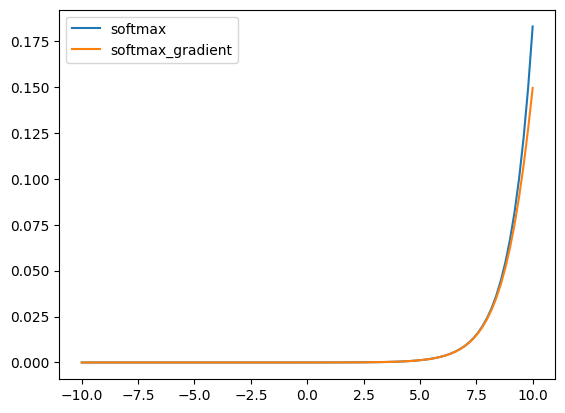

In [34]:
# Exercise 7. 
# Write in python a function to plot the softmax activation function and its gradient using matplotlib.

import numpy as np
import matplotlib.pyplot as plt

# softmax function
def softmax(x):
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x)

# softmax gradient
def softmax_gradient(x):
    s = softmax(x)
    return s * (1 - s)

# Plot the softmax function and its gradient
x = np.linspace(-10, 10, 100)
# softmax function
y = softmax(x)
# softmax gradient
z = softmax_gradient(x)

# Plot the softmax function and its gradient
plt.plot(x, y, label='softmax')
plt.plot(x, z, label='softmax_gradient')
plt.legend()
plt.show()

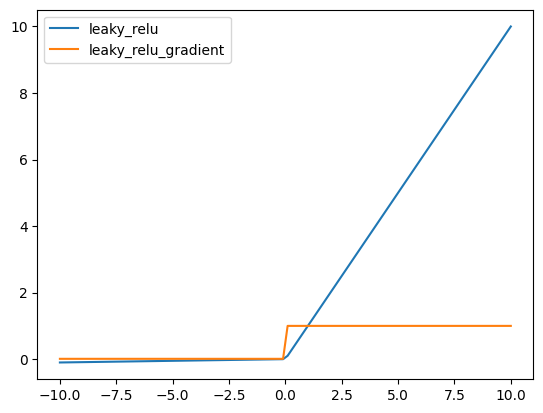

In [35]:
# Exercise 8. 
# Write in python a function to plot the leaky ReLU activation function and its gradient using matplotlib.

import numpy as np
import matplotlib.pyplot as plt

# leaky ReLU function
def leaky_relu(x, alpha=0.01):
    return np.maximum(alpha*x, x)

# leaky ReLU gradient
def leaky_relu_gradient(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

# Plot the leaky ReLU function and its gradient
x = np.linspace(-10, 10, 100)
# leaky ReLU function
y = leaky_relu(x)
# leaky ReLU gradient
z = leaky_relu_gradient(x)

# Plot the leaky ReLU function and its gradient
plt.plot(x, y, label='leaky_relu')
plt.plot(x, z, label='leaky_relu_gradient')
plt.legend()
plt.show()


In [36]:
import torch
import torch.nn as nn

input_size = 2
output_size = 1

class Perceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        self.activation = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.linear(x)
        x = self.activation(x)
        return x

In [37]:
perceptron = Perceptron(input_size, output_size)
x = torch.tensor([0.5, 0.2])
y = perceptron(x)
print(y)

tensor([0.6120], grad_fn=<SigmoidBackward0>)


In [38]:
# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer = torch.optim.SGD(perceptron.parameters(), lr=0.1)  # Stochastic gradient descent optimizer

# Generate some random input data and labels
input_data = torch.randn((10, input_size))
labels = torch.randint(0, 2, (10, output_size)).float()

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = perceptron(input_data)
    loss = criterion(outputs, labels)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.6547
Epoch [200/1000], Loss: 0.6545
Epoch [300/1000], Loss: 0.6545
Epoch [400/1000], Loss: 0.6545
Epoch [500/1000], Loss: 0.6545
Epoch [600/1000], Loss: 0.6545
Epoch [700/1000], Loss: 0.6545
Epoch [800/1000], Loss: 0.6545
Epoch [900/1000], Loss: 0.6545
Epoch [1000/1000], Loss: 0.6545


In [39]:
# Exercise 9: 
# Implement a binary classification model using the Perceptron class in PyTorch for the logic OR. 
# Your task is to create a Perceptron instance and train it using a proper  dataset and the binary cross-entropy loss with stochastic gradient 
# descent optimizer. 
# Here are the steps you can follow:
# Define a Perceptron class that inherits from torch.nn.Module and implements a binary classification model.
# Define a binary cross-entropy loss function using the torch.nn.BCEWithLogitsLoss module.
# Define a stochastic gradient descent optimizer using the torch.optim.SGD module.
# Train the Perceptron model on the training set using the binary cross-entropy loss and stochastic gradient descent optimizer.
# Evaluate the trained model compute the accuracy.

import torch
import torch.nn as nn
import torch.optim as optim

# Define the input and output data
x_train = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y_train = torch.tensor([[0], [1], [1], [1]], dtype=torch.float32)

# Define the Perceptron class
class Perceptron(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.linear(x)
        x = self.sigmoid(x)
        return x

# Create an instance of the Perceptron class
model = Perceptron()

# Define the binary cross-entropy loss function
criterion = nn.BCEWithLogitsLoss()

# Define the stochastic gradient descent optimizer
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Train the model on the training set
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_train)
    loss = criterion(outputs, y_train)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print training progress
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the trained model on the training set
with torch.no_grad():
    outputs = model(x_train)
    predicted = (outputs >= 0.5).float()
    accuracy = (predicted == y_train).float().mean()
    print(f'Training Accuracy: {accuracy.item():.4f}')

Epoch [100/1000], Loss: 0.5564
Epoch [200/1000], Loss: 0.5374
Epoch [300/1000], Loss: 0.5266
Epoch [400/1000], Loss: 0.5186
Epoch [500/1000], Loss: 0.5118
Epoch [600/1000], Loss: 0.5057
Epoch [700/1000], Loss: 0.4999
Epoch [800/1000], Loss: 0.4946
Epoch [900/1000], Loss: 0.4896
Epoch [1000/1000], Loss: 0.4851
Training Accuracy: 1.0000
